# <h1><center>Istanbul AirBnB Analysis & Prediction </center></h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/home/hp/Documents/dataset/listings.csv')
pd.set_option('display.max_columns',None)
df.head()

id                               name  host_id host_name  \
0   4826                          The Place     6603      Kaan   
1  20815  The Bosphorus from The Comfy Hill    78838    Gülder   
2  27271    LOVELY APT. IN PERFECT LOCATION   117026     Mutlu   
3  28277      Duplex Apartment with Terrace   121607      Alen   
4  28318    Cosy home overlooking Bosphorus   121721     Aydin   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN       Uskudar  41.05650   29.05367  Entire home/apt   
1                  NaN      Besiktas  41.06984   29.04545  Entire home/apt   
2                  NaN       Beyoglu  41.03254   28.98153  Entire home/apt   
3                  NaN         Sisli  41.04471   28.98567       Hotel room   
4                  NaN       Sariyer  41.09048   29.05559  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    720               1                  1  2009-06-01               0.01   
1    816             365                 41  2018-11-07               0.33   
2    233              30                 13  2018-05-04               0.19   
3    761               3                  0         NaN                NaN   
4    823               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               1               365  
1                               2               279  
2                               1               289  
3                              19               365  
4                               1                88

In [2]:
print('There are {} rows and {} columns'.format(df.shape[0],df.shape[1]))

There are 23728 rows and 16 columns


In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [4]:
df.describe()

id       host_id  neighbourhood_group      latitude  \
count  2.372800e+04  2.372800e+04                  0.0  23728.000000   
mean   2.913711e+07  1.493973e+08                  NaN     41.028416   
std    1.305964e+07  1.155452e+08                  NaN      0.045713   
min    4.826000e+03  6.603000e+03                  NaN     40.813960   
25%    2.101860e+07  3.285440e+07                  NaN     41.005120   
50%    3.398637e+07  1.477727e+08                  NaN     41.031850   
75%    3.965902e+07  2.588145e+08                  NaN     41.048530   
max    4.397093e+07  3.522041e+08                  NaN     41.479030   

          longitude         price  minimum_nights  number_of_reviews  \
count  23728.000000  23728.000000    23728.000000       23728.000000   
mean      28.982111    484.643248        4.525202           7.870828   
std        0.127503   1973.884093       27.614191          23.229127   
min       28.019010      0.000000        1.000000           0.000000   
25%       28.973210    137.000000        1.000000           0.000000   
50%       28.983485    247.000000        1.000000           0.000000   
75%       29.020050    446.000000        3.000000           4.000000   
max       29.907780  76922.000000     1125.000000         345.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  
count       11353.000000                    23728.000000      23728.000000  
mean            0.710177                        5.861767        227.709921  
std             0.902913                       16.535368        146.607077  
min             0.010000                        1.000000          0.000000  
25%             0.130000                        1.000000         89.000000  
50%             0.330000                        2.000000        302.000000  
75%             0.950000                        5.000000        365.000000  
max             9.200000                      176.000000        365.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23728 entries, 0 to 23727
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23728 non-null  int64  
 1   name                            23674 non-null  object 
 2   host_id                         23728 non-null  int64  
 3   host_name                       23727 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23728 non-null  object 
 6   latitude                        23728 non-null  float64
 7   longitude                       23728 non-null  float64
 8   room_type                       23728 non-null  object 
 9   price                           23728 non-null  int64  
 10  minimum_nights                  23728 non-null  int64  
 11  number_of_reviews               23728 non-null  int64  
 12  last_review                     

In [6]:
[("{} has {} unique nos".format(features,df[features].nunique())) for features in df.columns]

['id has 23728 unique nos',
 'name has 22690 unique nos',
 'host_id has 14450 unique nos',
 'host_name has 4907 unique nos',
 'neighbourhood_group has 0 unique nos',
 'neighbourhood has 39 unique nos',
 'latitude has 10858 unique nos',
 'longitude has 12458 unique nos',
 'room_type has 4 unique nos',
 'price has 501 unique nos',
 'minimum_nights has 65 unique nos',
 'number_of_reviews has 230 unique nos',
 'last_review has 1424 unique nos',
 'reviews_per_month has 473 unique nos',
 'calculated_host_listings_count has 35 unique nos',
 'availability_365 has 353 unique nos']

In [7]:
for count in df.columns:
    print("{} has {} value counts of".format(count,df[count].value_counts()))

id has 4826        1
38067685    1
38079332    1
38078563    1
38076981    1
           ..
27353162    1
27352540    1
27351573    1
27350727    1
43970934    1
Name: id, Length: 23728, dtype: int64 value counts of
name has İstanbul Birden fazla bölümden oluşan bina            31
Ev                                                    23
Home sweet home                                       16
Home                                                  13
Location - Sultanahmet/Breakfast included             11
                                                      ..
Clean& Quiet Residence/ Free WiFi @Istanbul Europe     1
Grand Halic Hotel Beyoglu Bed & Breakfast              1
Great location Flat in city center near metro          1
Private double room & central location in Moda         1
Şile sahilinin eşşiz manzarası sizleri bekliyor        1
Name: name, Length: 22690, dtype: int64 value counts of
host_id has 45788344     176
213157136     66
21907588      65
194230296     58
157100965    

In [8]:
df['price'].nunique()

501

In [9]:
df.isna().sum()

id                                    0
name                                 54
host_id                               0
host_name                             1
neighbourhood_group               23728
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       12375
reviews_per_month                 12375
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### EDA Analysis

<AxesSubplot:>

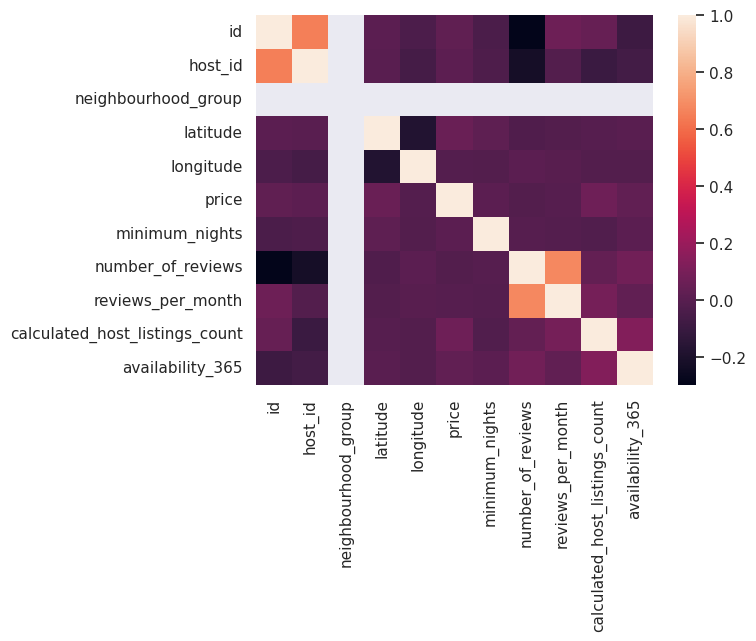

In [10]:
sns.set()
sns.heatmap(data=df.corr())

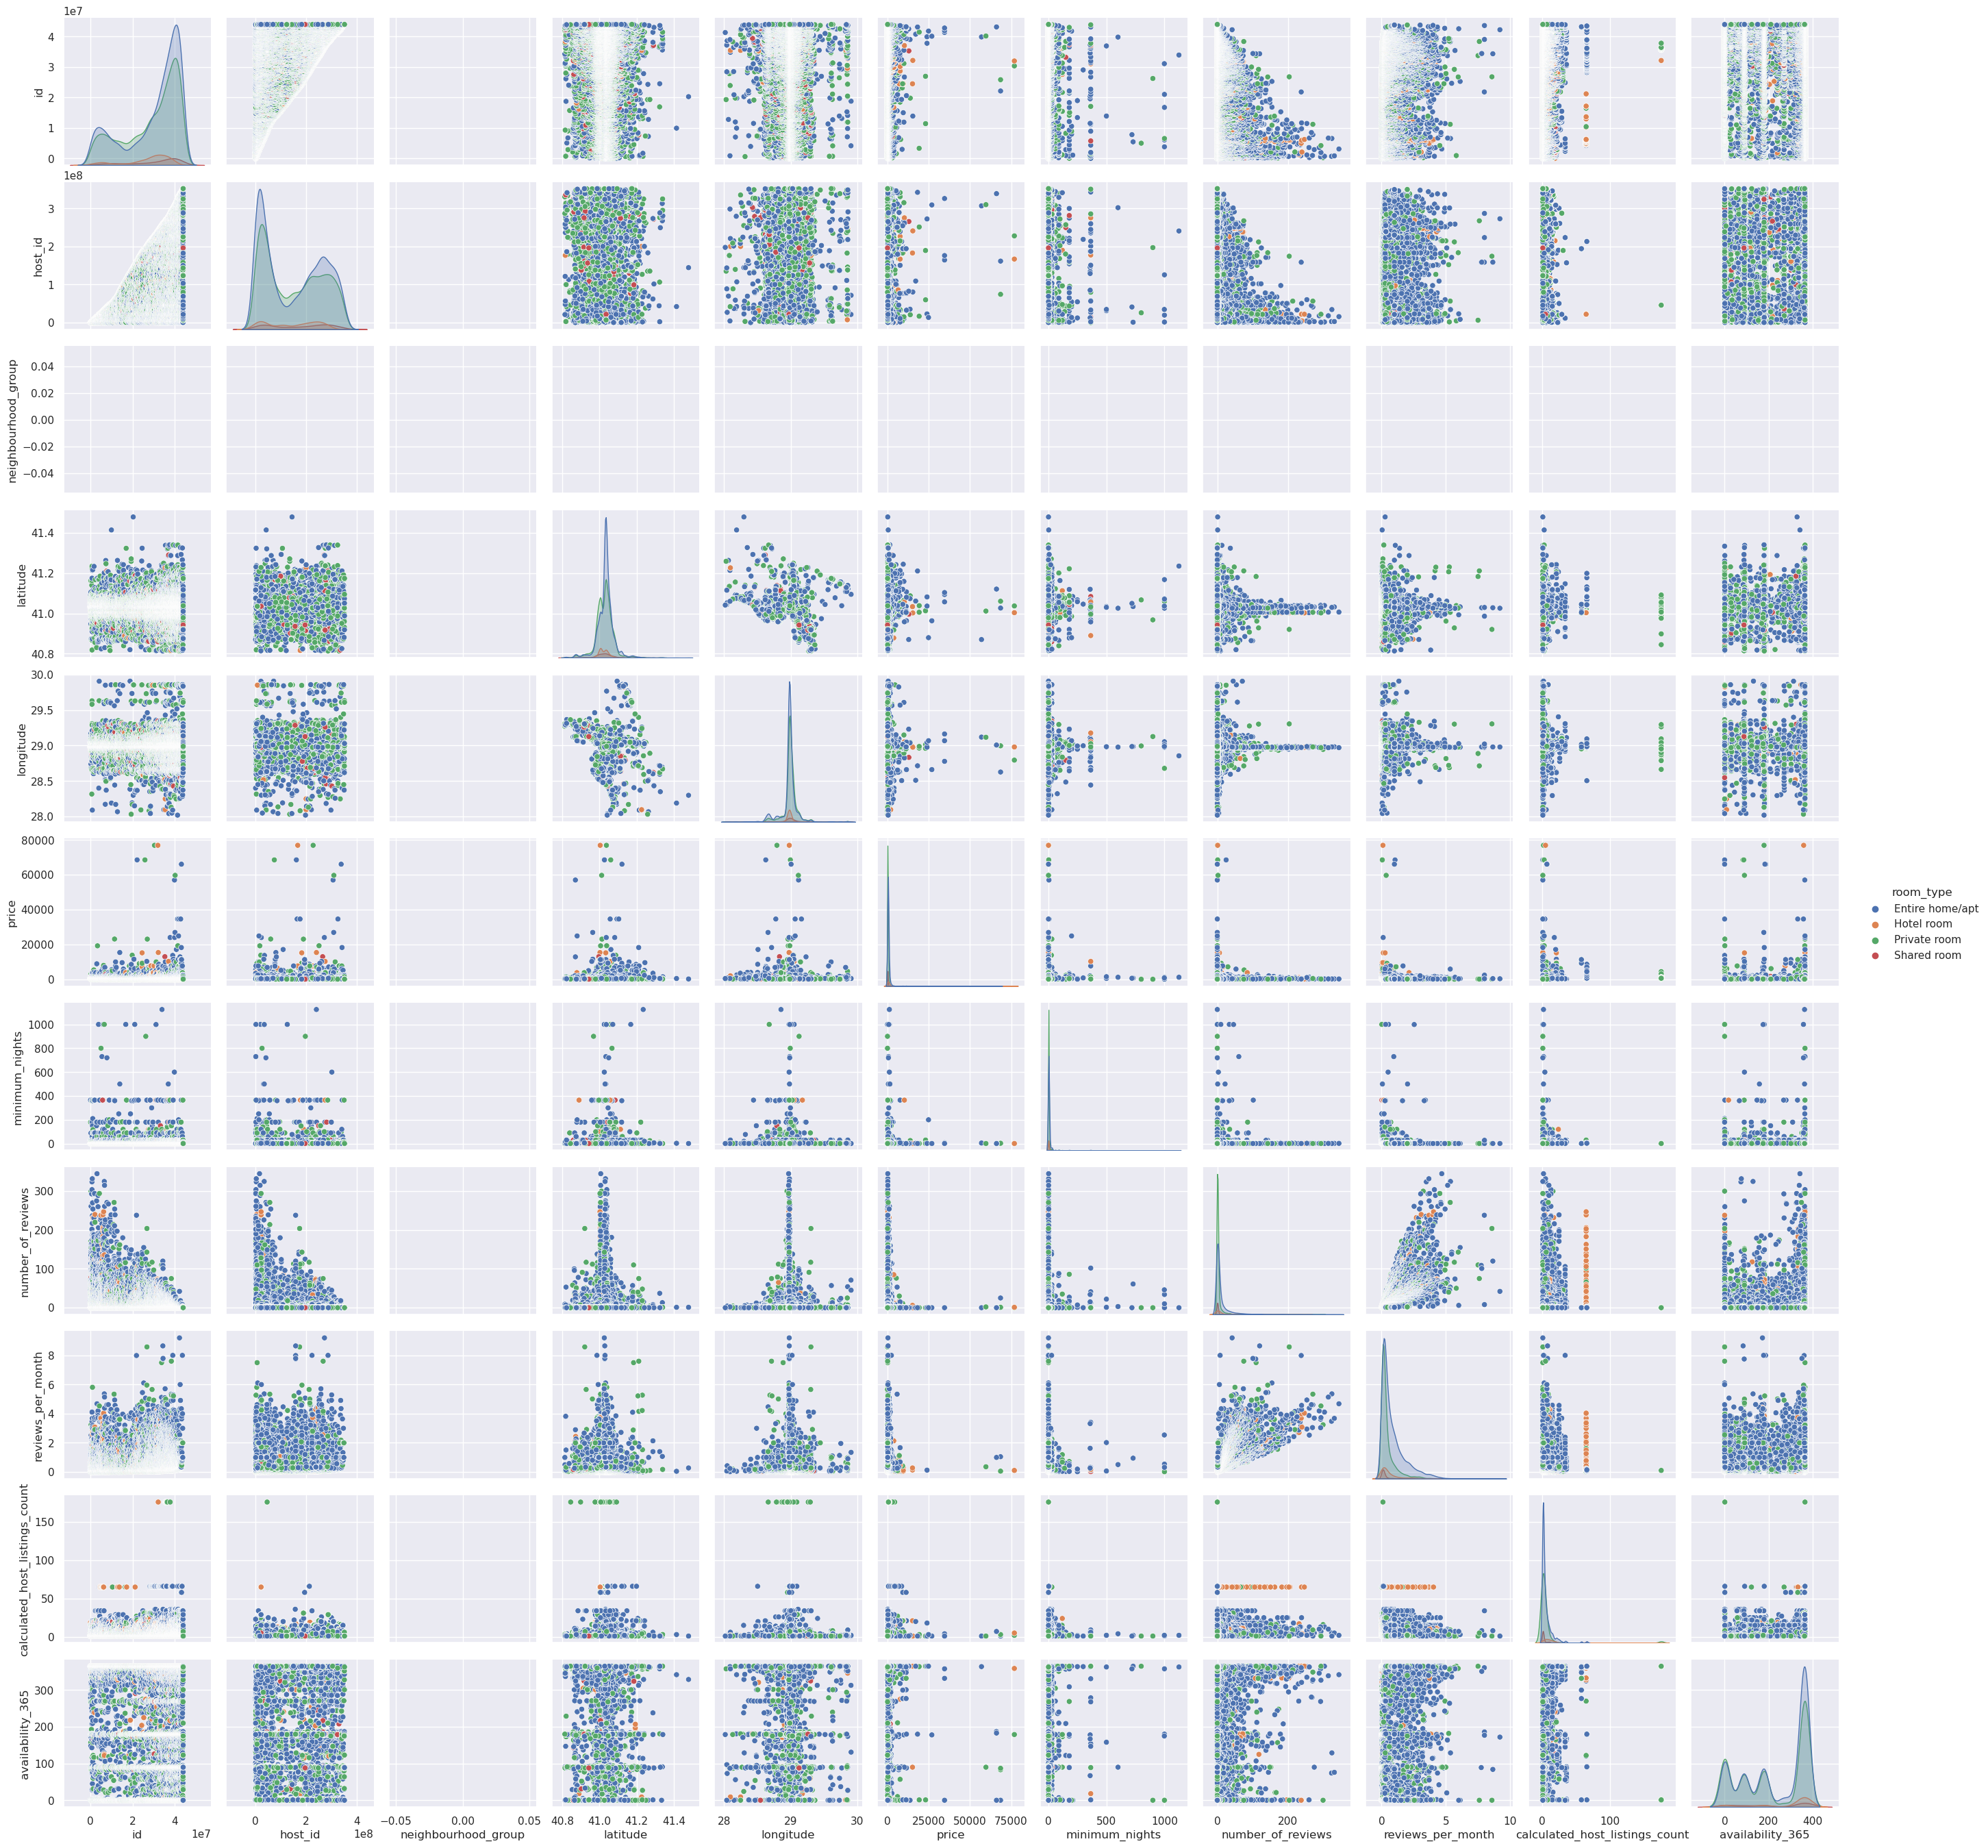

In [11]:
sns.pairplot(data=df,hue="room_type")

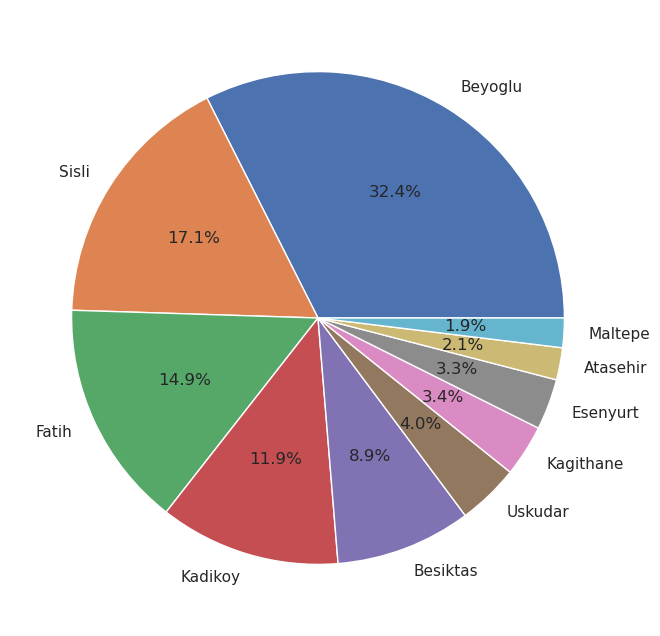

In [12]:
nh=df['neighbourhood'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.pie(nh, labels=nh.index, autopct='%1.1f%%')
plt.show()

<AxesSubplot:xlabel='room_type', ylabel='count'>

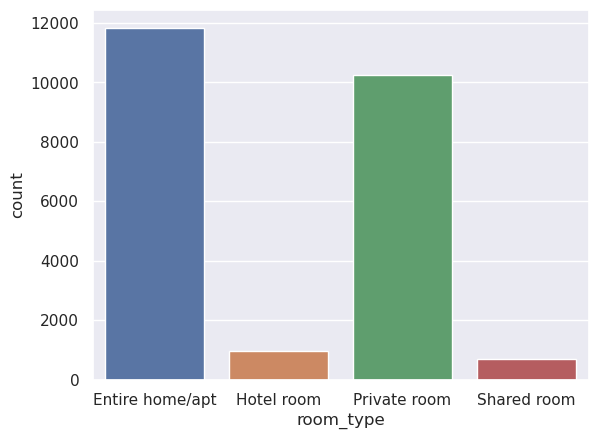

In [13]:
sns.countplot(x=df['room_type'],data=df)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Entire home/apt'),
  Text(1, 0, 'Hotel room'),
  Text(2, 0, 'Private room'),
  Text(3, 0, 'Shared room')])

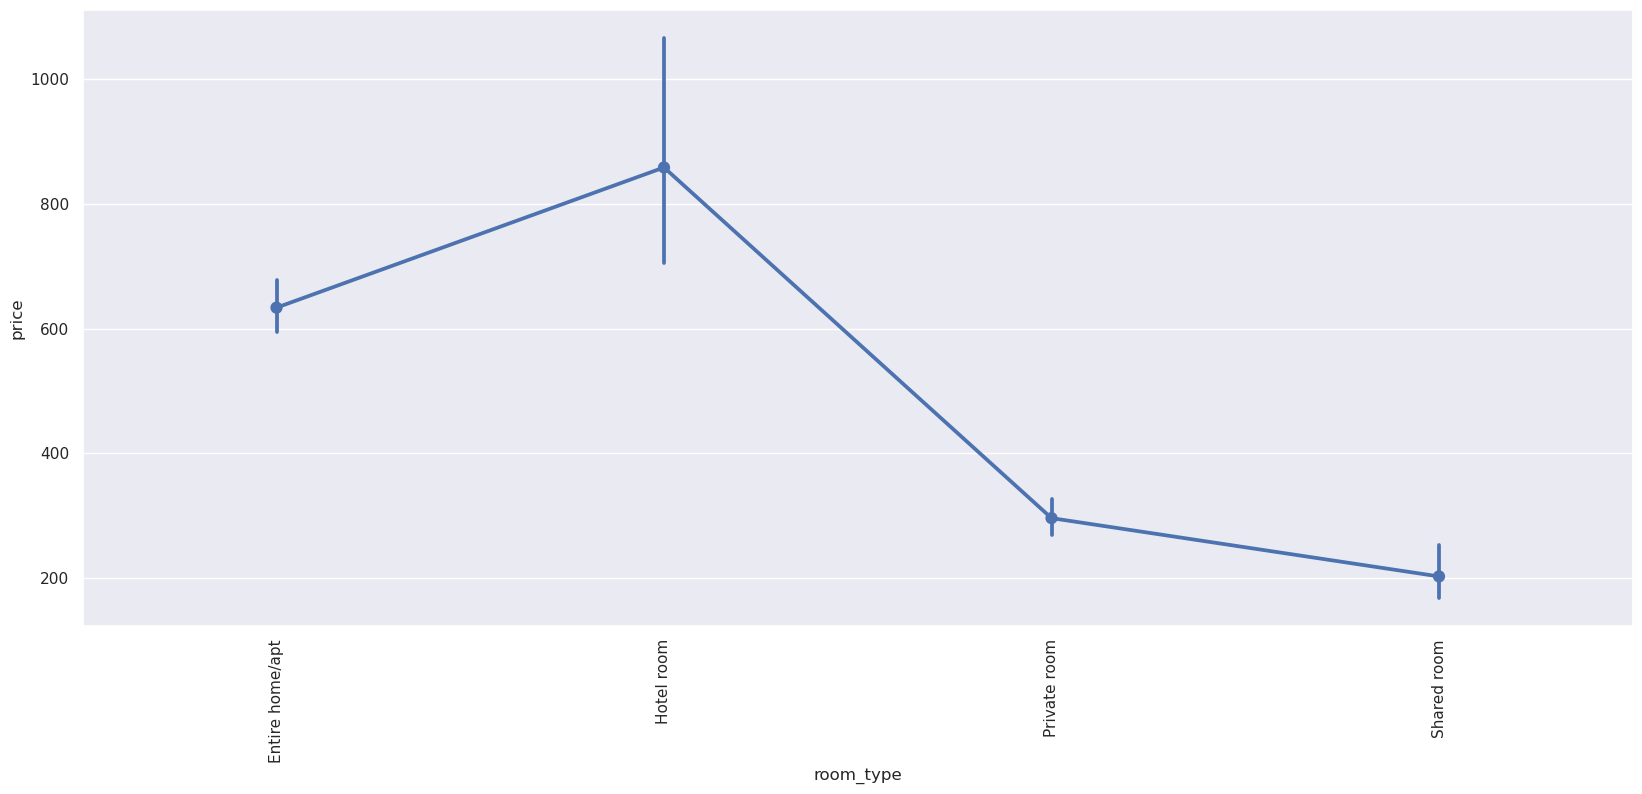

In [14]:
plt.figure(figsize=(20,8))
sns.pointplot(x=df['room_type'],y=df['price'],data=df)
plt.xticks(rotation=90)

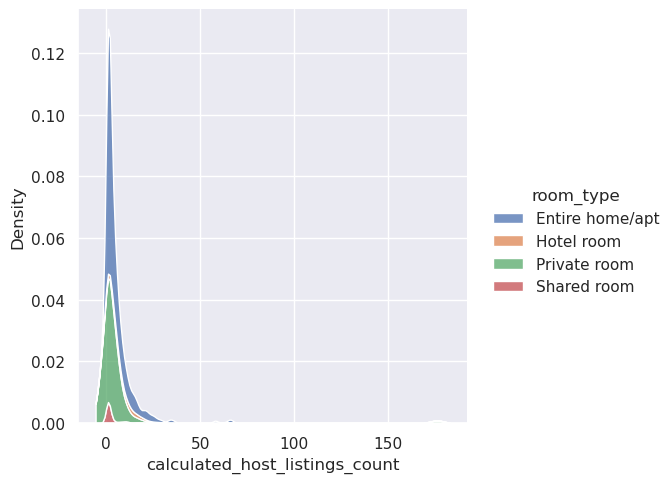

In [15]:
sns.displot(data=df, x='calculated_host_listings_count',hue="room_type",multiple="stack",kind="kde")

Text(0.5, 1.0, 'Distribution of room type')

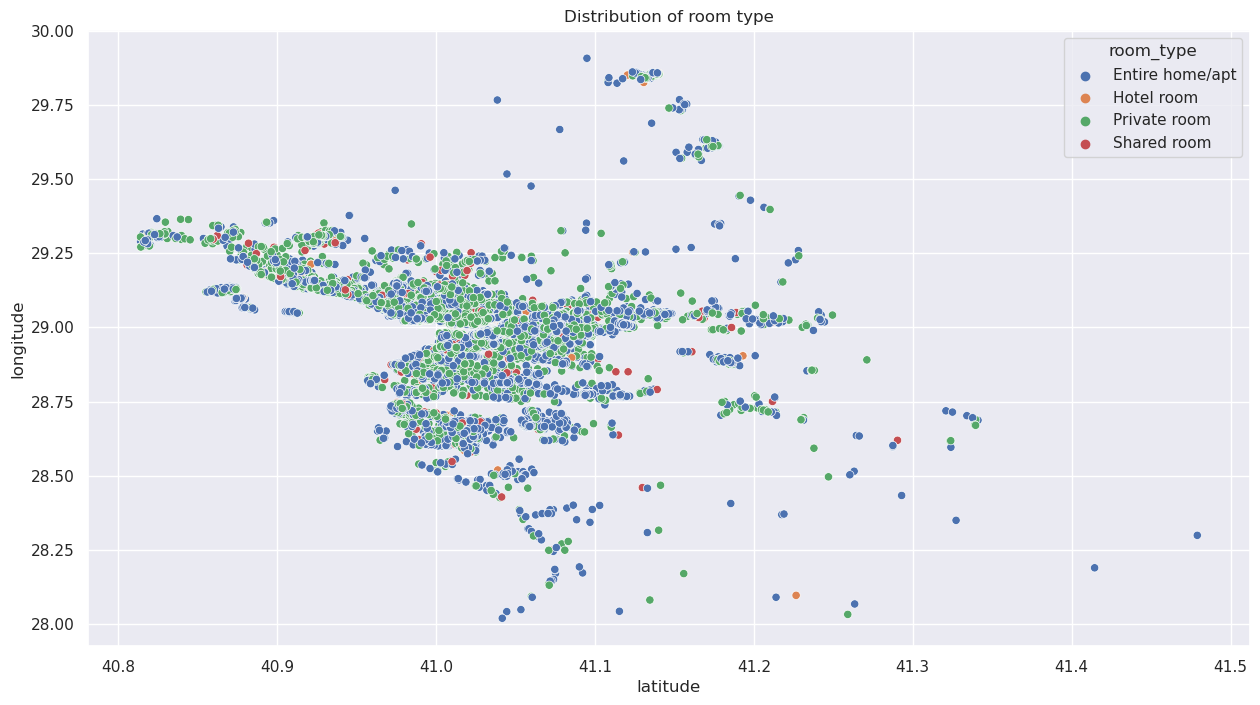

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(df['latitude'],df['longitude'],hue=df['room_type'])
plt.title('Distribution of room type')

### Cleaning data

In [17]:
df.isna().sum()

id                                    0
name                                 54
host_id                               0
host_name                             1
neighbourhood_group               23728
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       12375
reviews_per_month                 12375
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [18]:
df.drop(['id','name','host_id','host_name','neighbourhood_group','latitude','longitude','last_review','reviews_per_month'],axis=1,inplace=True)
df.head()

neighbourhood        room_type  price  minimum_nights  number_of_reviews  \
0       Uskudar  Entire home/apt    720               1                  1   
1      Besiktas  Entire home/apt    816             365                 41   
2       Beyoglu  Entire home/apt    233              30                 13   
3         Sisli       Hotel room    761               3                  0   
4       Sariyer  Entire home/apt    823               3                  0   

   calculated_host_listings_count  availability_365  
0                               1               365  
1                               2               279  
2                               1               289  
3                              19               365  
4                               1                88

In [19]:
dummies=pd.get_dummies(df[['neighbourhood','room_type']],drop_first=True)
dummies

neighbourhood_Arnavutkoy  neighbourhood_Atasehir  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   
...                         ...                     ...   
23723                         0                       0   
23724                         0                       0   
23725                         0                       0   
23726                         0                       0   
23727                         0                       0   

       neighbourhood_Avcilar  neighbourhood_Bagcilar  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   
...                      ...                     ...   
23723                      1                       0   
23724                      0                       0   
23725                      0                       0   
23726                      0                       0   
23727                      0                       0   

       neighbourhood_Bahcelievler  neighbourhood_Bakirkoy  \
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                               0                       0   
4                               0                       0   
...                           ...                     ...   
23723                           0                       0   
23724                           0                       0   
23725                           0                       0   
23726                           0                       0   
23727                           0                       0   

       neighbourhood_Basaksehir  neighbourhood_Bayrampasa  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   
...                         ...                       ...   
23723                         0                         0   
23724                         0                         0   
23725                         0                         0   
23726                         0                         0   
23727                         0                         0   

       neighbourhood_Besiktas  neighbourhood_Beykoz  neighbourhood_Beylikduzu  \
0                           0                     0                         0   
1                           1                     0                         0   
2                           0                     0                         0   
3                           0                     0                         0   
4                           0                     0                         0   
...                       ...                   ...                       ...   
23723                       0                     0                         0   
23724                       0                     0                         0   
23725                       0                     0                         0   
23726                       0                     0                         0   
23727                       0                     0                         0   

       neighbourhood_Beyoglu  neighbourhood_Buyukcekmece  \
0                          0                           0   
1                          0                           0   
2     

In [20]:
df1=pd.concat([df,dummies],axis=1)
df1

neighbourhood        room_type  price  minimum_nights  \
0           Uskudar  Entire home/apt    720               1   
1          Besiktas  Entire home/apt    816             365   
2           Beyoglu  Entire home/apt    233              30   
3             Sisli       Hotel room    761               3   
4           Sariyer  Entire home/apt    823               3   
...             ...              ...    ...             ...   
23723       Avcilar     Private room    171               1   
23724         Sisli  Entire home/apt    597               1   
23725       Beyoglu     Private room    144               1   
23726      Esenyurt  Entire home/apt    603               2   
23727          Sile     Private room    103               1   

       number_of_reviews  calculated_host_listings_count  availability_365  \
0                      1                               1               365   
1                     41                               2               279   
2                     13                               1               289   
3                      0                              19               365   
4                      0                               1                88   
...                  ...                             ...               ...   
23723                  0                               2               175   
23724                  0                              15               363   
23725                  0                               7               210   
23726                  0                               1                90   
23727                  0                               1               363   

       neighbourhood_Arnavutkoy  neighbourhood_Atasehir  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   
...                         ...                     ...   
23723                         0                       0   
23724                         0                       0   
23725                         0                       0   
23726                         0                       0   
23727                         0                       0   

       neighbourhood_Avcilar  neighbourhood_Bagcilar  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   
...                      ...                     ...   
23723                      1                       0   
23724                      0                       0   
23725                      0                       0   
23726                      0                       0   
23727                      0                       0   

       neighbourhood_Bahcelievler  neighbourhood_Bakirkoy  \
0                               0                       0   
1                               0                       0   
2                               0                       0   
3                               0                       0   
4                               0                       0   
...                           ...                     ...   
23723                           0                       0   
23724                           0                       0   
23725                           0                       0   
23726                           0                       0   
23727                           0                       0   

       neighbourhood_Basaksehir  neighbourhood_Bayrampasa  \
0                             0                         0   
1                             0                         0   
2             

In [21]:
df1.drop(['neighbourhood'],axis=1,inplace=True)
df1.drop(['room_type'],axis=1,inplace=True)
df1.sample(5)

price  minimum_nights  number_of_reviews  \
6461     644               2                 33   
4425     336               2                123   
18801    274               1                  0   
3038     768               1                  0   
7017     501               3                  0   

       calculated_host_listings_count  availability_365  \
6461                                1               364   
4425                                4               351   
18801                              20                 1   
3038                                9                 0   
7017                                1                83   

       neighbourhood_Arnavutkoy  neighbourhood_Atasehir  \
6461                          0                       0   
4425                          0                       0   
18801                         0                       0   
3038                          0                       0   
7017                          0                       0   

       neighbourhood_Avcilar  neighbourhood_Bagcilar  \
6461                       0                       0   
4425                       0                       0   
18801                      0                       0   
3038                       0                       0   
7017                       0                       0   

       neighbourhood_Bahcelievler  neighbourhood_Bakirkoy  \
6461                            0                       0   
4425                            0                       0   
18801                           0                       0   
3038                            0                       0   
7017                            0                       0   

       neighbourhood_Basaksehir  neighbourhood_Bayrampasa  \
6461                          0                         0   
4425                          0                         0   
18801                         0                         0   
3038                          0                         0   
7017                          0                         0   

       neighbourhood_Besiktas  neighbourhood_Beykoz  neighbourhood_Beylikduzu  \
6461                        0                     0                         0   
4425                        0                     0                         0   
18801                       0                     0                         0   
3038                        0                     0                         0   
7017                        0                     1                         0   

       neighbourhood_Beyoglu  neighbourhood_Buyukcekmece  \
6461                       0                           0   
4425                       0                           0   
18801                      0                           0   
3038                       0                           0   
7017                       0                           0   

       neighbourhood_Catalca  neighbourhood_Cekmekoy  neighbourhood_Esenler  \
6461                       0                       0                      0   
4425                       0                       0                      0   
18801                      0                       0                      0   
3038                       0                       0                      0   
7017                       0                       0                      0   

       neighbourhood_Esenyurt  neighbourhood_Eyup  neighbourhood_Fatih  \
6461                        0                   0                    0   
4425                        0                   0                    1   
18801                       0                   0                    0   
3038                        0                   0                    0   
7017                        0                   0                    0   

       neighbourhood_Gaziosmanpasa  neighbourhood_Gungoren  \
6461                             0                       0   
4425                       

In [22]:
df1.dtypes

price                             int64
minimum_nights                    int64
number_of_reviews                 int64
calculated_host_listings_count    int64
availability_365                  int64
neighbourhood_Arnavutkoy          uint8
neighbourhood_Atasehir            uint8
neighbourhood_Avcilar             uint8
neighbourhood_Bagcilar            uint8
neighbourhood_Bahcelievler        uint8
neighbourhood_Bakirkoy            uint8
neighbourhood_Basaksehir          uint8
neighbourhood_Bayrampasa          uint8
neighbourhood_Besiktas            uint8
neighbourhood_Beykoz              uint8
neighbourhood_Beylikduzu          uint8
neighbourhood_Beyoglu             uint8
neighbourhood_Buyukcekmece        uint8
neighbourhood_Catalca             uint8
neighbourhood_Cekmekoy            uint8
neighbourhood_Esenler             uint8
neighbourhood_Esenyurt            uint8
neighbourhood_Eyup                uint8
neighbourhood_Fatih               uint8
neighbourhood_Gaziosmanpasa       uint8


In [23]:
df1.isna().sum().any()

False

In [24]:
y=df1.iloc[:,0].values
x=df1.iloc[:,1:].values
x

array([[  1,   1,   1, ...,   0,   0,   0],
       [365,  41,   2, ...,   0,   0,   0],
       [ 30,  13,   1, ...,   0,   0,   0],
       ...,
       [  1,   0,   7, ...,   0,   1,   0],
       [  2,   0,   1, ...,   0,   0,   0],
       [  1,   0,   1, ...,   0,   1,   0]])

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=101)
print(x.shape,x_train.shape,x_test.shape)

(23728, 45) (18982, 45) (4746, 45)


In [26]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[-0.12504022,  0.43526782, -0.29224677, ..., -0.20380469,
        -0.87376818, -0.17435147],
       [-0.12504022, -0.33469469, -0.29224677, ..., -0.20380469,
        -0.87376818, -0.17435147],
       [-0.12504022, -0.33469469, -0.29224677, ..., -0.20380469,
        -0.87376818, -0.17435147],
       ...,
       [-0.12504022, -0.33469469,  0.06958922, ..., -0.20380469,
        -0.87376818, -0.17435147],
       [-0.08923252, -0.2491433 , -0.29224677, ..., -0.20380469,
        -0.87376818, -0.17435147],
       [-0.08923252, -0.33469469, -0.17163478, ..., -0.20380469,
         1.14446832, -0.17435147]])

In [27]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
y_pred

array([366.76509296, 363.98412393, 580.06876025, ..., 803.65322963,
       523.69780792, 232.17075635])

In [28]:
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean absolute percentage error:',mean_absolute_percentage_error(y_test,y_pred))
print('Mean squarred error:',mean_squared_error(y_test,y_pred))
print('R2 square:',r2_score(y_test,y_pred))

Mean absolute error: 391.16769667766465
Mean absolute percentage error: 1.340335118311022
Mean squarred error: 3181284.8958829646
R2 square: 0.029883306521770625


In [29]:
dfpd=pd.DataFrame({'Actual value':y_test,'Predicted value':y_pred,'Difference':y_test-y_pred})
dfpd

Actual value  Predicted value    Difference
0              206       366.765093   -160.765093
1              343       363.984124    -20.984124
2              857       580.068760    276.931240
3              192        66.701410    125.298590
4              226        66.701410    159.298590
...            ...              ...           ...
4741           103       289.835037   -186.835037
4742            69        94.301682    -25.301682
4743         66091       803.653230  65287.346770
4744           754       523.697808    230.302192
4745           199       232.170756    -33.170756

[4746 rows x 3 columns]

Text(0.5, 1.0, 'Actual vs predicted price')

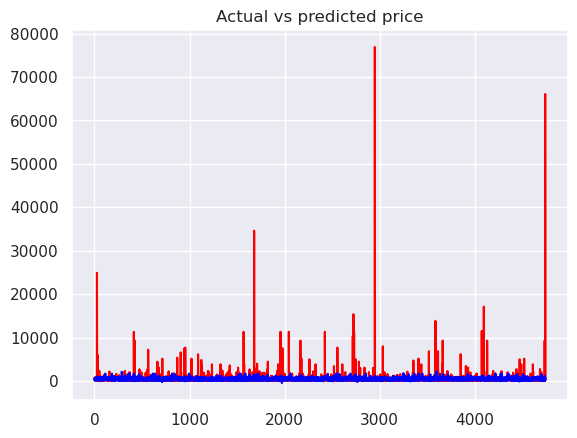

In [30]:
plt.plot(y_test,color='red',label='Actual values')
plt.plot(y_pred,color='blue',label='Predicted values')
plt.title('Actual vs predicted price')

<ul>
    <li>There seems to be variation in Predicted price (for higher price range category) as in comparision with the acual price and more inputs and features need to be processed and scaled for future scope predictions.</li>

</ul>